In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch
from iopath.common.file_io import PathManager
from iopath.fb.manifold import ManifoldPathHandler

sys.path.insert(0, "fbcode/ar_sharing/body_tracking_3d/models/hmr/")

pathmgr = PathManager()
pathmgr.register_handler(ManifoldPathHandler(), allow_override=True)

%load_ext autoreload
%autoreload 2

I0930 074520.036 font_manager.py:1349] generated new fontManager


I0930 074520.712 _utils_internal.py:179] NCCL_DEBUG env var is set to None


I0930 074520.713 _utils_internal.py:188] NCCL_DEBUG is INFO from /etc/nccl.conf


I0930 074523.559 parsh_logger.py:29] %autoreload 2 was called with 


In [2]:
from src.utils.plot_utils_experiment_check import plot_shape_pose_norm, plot_mpjpes_and_accel, plot_mpjpes

In [9]:
exp_names = {
    # "flow2d long epochs" : "seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__lr_1e-4",
    "flow2d": "seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs",
    # "flow2d_20220930" : "seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__20220930",
    # "smoothing": "seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30",
    # "flow2d + smoothing" : "seq_optim_flow__temp_smooth/seq_optim__coco-all__3dpw_test_seq_339__flow2d__temp_smooth__shape_30__j3d_30__ker30",
    # "flow3d init" : "seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow3d",
}

I0930 074704.469 manifold.py:1452] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/metrics/full_train.pth ...


I0930 074704.934 manifold.py:1506] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/metrics/full_train.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/metrics/full_train.pth


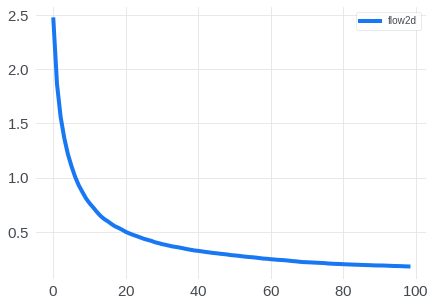

In [10]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
for name, exp_name in exp_names.items():
    full_train = torch.load(pathmgr.get_local_path(f"manifold://xr_body/tree/personal/andreydavydov/my_exps/{exp_name}/metrics/full_train.pth", force=True))
    ax.plot(full_train['prev_vals'], label=name)

ax.legend()
fig.patch.set_facecolor("white")

I0930 074706.672 manifold.py:1452] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/metrics/pose2d_valid.pth ...


I0930 074707.162 manifold.py:1506] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/metrics/pose2d_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/metrics/pose2d_valid.pth


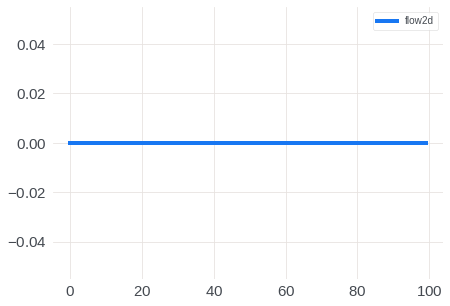

In [11]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
for name, exp_name in exp_names.items():
    loss = torch.load(pathmgr.get_local_path(f"manifold://xr_body/tree/personal/andreydavydov/my_exps/{exp_name}/metrics/pose2d_valid.pth", force=True))
    ax.plot(loss['prev_vals'], label=name)

ax.legend()
fig.patch.set_facecolor("white")

I0930 074709.079 manifold.py:1452] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/metrics/pa_mpjpe_vs_gt_valid.pth ...


I0930 074709.589 manifold.py:1506] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/metrics/pa_mpjpe_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/metrics/pa_mpjpe_vs_gt_valid.pth


I0930 074709.593 manifold.py:1452] Caching manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/metrics/accel_err_vs_gt_valid.pth ...


I0930 074710.044 manifold.py:1506] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/metrics/accel_err_vs_gt_valid.pth cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/metrics/accel_err_vs_gt_valid.pth


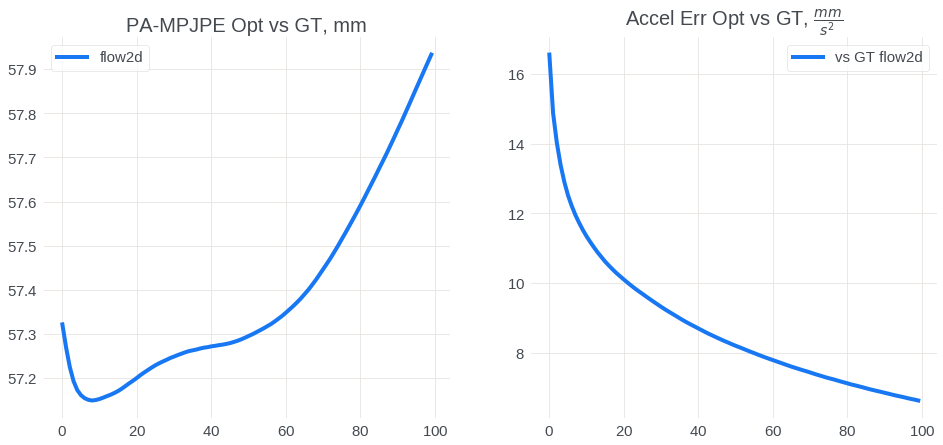

In [12]:
fig = plot_mpjpes_and_accel(exp_names)
# fig = plot_shape_pose_norm(exp_names)

In [75]:
from src.functional import smpl
from src.utils.video_utils import write_video

device = "cuda:0"
smpl_model = smpl.get_smpl_model("h36m", device=device)
fps = 20
batch_size = 339
img_size = torch.tensor([224, 224]).repeat(batch_size, 1).to(device)
faces = smpl_model.faces.astype(int)

import os

video_dir = "/tmp/videos_seq_optim_optical_flow/"
os.makedirs(video_dir, exist_ok=True)

import numpy as np


def render_verts_only(verts, faces, device, img_size=512):
    verts_mean = verts.copy().mean(axis=0, keepdims=True)
    verts -= verts_mean
    scale = 1  # 0.8
    verts *= scale
    verts = (verts + 1) / 2 * img_size
    # img = np.zeros((img_size,img_size,3))
    img = (255 * np.ones((img_size, img_size, 3))).astype("uint8")
    blend = render_mesh_onto_image(img, verts, faces, device)
    return blend

I0930 020829.446 manifold.py:1442] URL manifold://xr_body/tree/personal/andreydavydov/eft/extradata/smpl/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl was already cached in /home/andreydavydov/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/eft/extradata/smpl/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl


I0930 020829.598 manifold.py:1442] URL manifold://xr_body/tree/personal/andreydavydov/eft/extradata/data_from_spin/J_regressor_h36m.npy was already cached in /home/andreydavydov/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/eft/extradata/data_from_spin/J_regressor_h36m.npy


In [21]:
from src.datasets.datasets_common import UNNORMALIZE

seq = "downtown_runForBus_01_0"
f_name = f"sample_3dpw_test_seq_{seq}__hmr_coco_all.pth"
remote_path = f"manifold://xr_body/tree/personal/andreydavydov/3dpw_seq_for_tests/{f_name}"

seq = torch.load(pathmgr.get_local_path(remote_path))

num_frames = 339
for k in seq:
    seq[k] = seq[k][:num_frames]

img_orig = UNNORMALIZE(seq["img"]).permute(0, 2, 3, 1).numpy().astype("uint8")

write_video(img_orig, f"{video_dir}orig.mp4", fps=fps)

from src.models.seq_optim import get_smpl_out
from src.utils.img_utils import convert_norm_points_to_bbox
from src.utils.vis_utils import render_mesh_onto_image

rotmat_init = seq["pred_rotmat"].to(device)
shape_init = seq["pred_shape"].to(device)
camera_init = seq["pred_camera"].to(device)

_, _, verts_all = get_smpl_out(shape_init, rotmat_init, camera_init, smpl_model, pose2rot=False)

scale, trans = camera_init[:, 0], camera_init[:, 1:]
verts_all_bbox = convert_norm_points_to_bbox(verts_all, scale, trans, img_size)

l, r = 50, 50
frames_out = []
for i in range(len(verts_all_bbox)):
    verts = verts_all_bbox[i].cpu().numpy()
    img = img_orig[i]
    blend = render_mesh_onto_image(img, verts, faces, device)[:,l:-r]
    frames_out.append(blend)

write_video(frames_out, f"{video_dir}pred_hmr.mp4", fps=fps)

l, r = 100, 100 # orig size is 512 x 512
frames_out = []
for i in range(len(verts_all)):
    verts = verts_all[i].cpu().numpy()
    blend = render_verts_only(verts, faces, device)[:, l:-r]
    frames_out.append(blend)

write_video(frames_out, f"{video_dir}verts_pred_hmr.mp4", fps=fps)

I0928 062033.141 manifold.py:1442] URL manifold://xr_body/tree/personal/andreydavydov/3dpw_seq_for_tests/sample_3dpw_test_seq_downtown_runForBus_01_0__hmr_coco_all.pth was already cached in /home/andreydavydov/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/3dpw_seq_for_tests/sample_3dpw_test_seq_downtown_runForBus_01_0__hmr_coco_all.pth


Video is saved to '/tmp/videos_seq_optim_optical_flow/orig.mp4'


/data/sandcastle/boxes/fbsource/buck-out/v2/gen/fbcode/110b607930331a92/ar_sharing/body_tracking_3d/models/hmr/__bento_kernel_body_tracking__/bento_kernel_body_tracking#link-tree/pytorch3d/renderer/mesh/textures.py:324: PendingDeprecationWarning:

Textures class is deprecated,
        use TexturesUV, TexturesAtlas, TexturesVertex instead.
        Textures class will be removed in future releases.



Video is saved to '/tmp/videos_seq_optim_optical_flow/pred_hmr.mp4'


Video is saved to '/tmp/videos_seq_optim_optical_flow/verts_pred_hmr.mp4'


## save Our Flow2d trainings

In [28]:
from tqdm import tqdm

In [24]:
video_dir = "/tmp/videos_TCMR/"
os.makedirs(video_dir, exist_ok=True)

In [35]:
# common_name = "seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs"
# common_name = "seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__lr_1e-4"
ckpt_names = {
    # "flow2d_epoch_1": f"manifold://xr_body/tree/personal/andreydavydov/my_exps/{common_name}/ckpt_0001.pth",
    # "flow2d_long_epoch_5": f"manifold://xr_body/tree/personal/andreydavydov/my_exps/{common_name}/ckpt_0005.pth",
    # "flow2d_long_epoch_20": f"manifold://xr_body/tree/personal/andreydavydov/my_exps/{common_name}/ckpt_0020.pth",
    # "flow2d_epoch_100": f"manifold://xr_body/tree/personal/andreydavydov/my_exps/{common_name}/ckpt_0099.pth",
    "flow2d": "manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/ckpt.pth",
    "smoothing": "manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/ckpt.pth",
}

for name, ckpt_path in ckpt_names.items():
    ckpt = torch.load(pathmgr.get_local_path(ckpt_path), map_location="cpu")["seqOpt_state_dict"]

    pose = ckpt["pose"].to(device)
    shape = ckpt["shape"].to(device)
    camera = ckpt["camera"].to(device)

    _, _, verts_all = get_smpl_out(shape, pose, camera, smpl_model, pose2rot=True)

    l, r = 100, 100
    fps = 30
    num_frames = 300
    frames_out = []
    for i in tqdm(range(num_frames)):
        verts = verts_all[i].cpu().numpy()
        blend = render_verts_only(verts, faces, device)[:, l:-r]
        frames_out.append(blend)

    write_video(frames_out, f"{video_dir}verts_{name}.mp4", fps=fps)

# for name, ckpt_path in ckpt_names.items():
#     ckpt = torch.load(pathmgr.get_local_path(ckpt_path), map_location="cpu")["seqOpt_state_dict"]

#     pose = ckpt["pose"].to(device)
#     shape = ckpt["shape"].to(device)
#     camera = ckpt["camera"].to(device)

#     _, _, verts_all = get_smpl_out(shape, pose, camera, smpl_model, pose2rot=True)
#     scale, trans = camera[:, 0], camera[:, 1:]
#     verts_all_bbox = convert_norm_points_to_bbox(verts_all, scale, trans, img_size)

#     l, r = 50, 50
#     frames_out = []
#     for i in tqdm(range(len(verts_all_bbox))):
#         verts = verts_all_bbox[i].cpu().numpy()
#         img = img_orig[i]
#         blend = render_mesh_onto_image(img, verts, faces, device)[:, l:-r]
#         frames_out.append(blend)

#     write_video(frames_out, f"{video_dir}Ours_{name}.mp4", fps=fps)

#     l, r = 100, 100
#     frames_out = []
#     for i in tqdm(range(len(verts_all))):
#         verts = verts_all[i].cpu().numpy()
#         blend = render_verts_only(verts, faces, device)[:, l:-r]
#         frames_out.append(blend)

#     write_video(frames_out, f"{video_dir}verts_Ours_{name}.mp4", fps=fps)

I0928 062406.575 manifold.py:1442] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/ckpt.pth was already cached in /home/andreydavydov/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/ckpt.pth


  0%|          | 0/300 [00:00<?, ?it/s]/data/sandcastle/boxes/fbsource/buck-out/v2/gen/fbcode/110b607930331a92/ar_sharing/body_tracking_3d/models/hmr/__bento_kernel_body_tracking__/bento_kernel_body_tracking#link-tree/pytorch3d/renderer/mesh/textures.py:324: PendingDeprecationWarning:

Textures class is deprecated,
        use TexturesUV, TexturesAtlas, TexturesVertex instead.
        Textures class will be removed in future releases.

100%|██████████| 300/300 [00:14<00:00, 20.55it/s]


I0928 062421.824 manifold.py:1442] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/ckpt.pth was already cached in /home/andreydavydov/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/ckpt.pth


Video is saved to '/tmp/videos_TCMR/verts_flow2d.mp4'


100%|██████████| 300/300 [00:13<00:00, 22.92it/s]


Video is saved to '/tmp/videos_TCMR/verts_smoothing.mp4'


# acceleration

In [5]:
def accel(points):
    velocities = points[1:] - points[:-1]
    acceleration = velocities[1:] - velocities[:-1]
    return acceleration


def norm_accel(acceleration):
    acceleration_normed = torch.linalg.norm(acceleration, dim=2)
    return acceleration_normed  # B x N


def accel_err(accel_pred, accel_gt):
    """
    accel_pred, accel_gt - B x N x 3
    """
    err_normed = norm_accel(accel_pred - accel_gt)  # B x N
    return err_normed.mean(dim=1)  # B


def accel_err_between_normed(accel_pred, accel_gt):
    """
    Computes abs distances between normed accelerations
    accel_pred, accel_gt - B x N x 3
    """
    accel_pred = norm_accel(accel_pred).mean(dim=1)  # B
    accel_gt = norm_accel(accel_gt).mean(dim=1)  # B
    err_normed = (accel_pred - accel_gt).abs() # B
    return err_normed

In [11]:
from src.models.seq_optim import get_smpl_out, SeqModel

device = "cuda:0"
### gt
seqOpt = SeqModel(
    "manifold://xr_body/tree/personal/andreydavydov/3dpw_seq_for_tests/sample_3dpw_test_seq_downtown_runForBus_01_0__hmr_coco_all.pth",
    339,
)
seqOpt = seqOpt.to(device)
theta = seqOpt.orig_seq["theta"].to(device)
gt_smpl_pose, gt_smpl_shape = theta[:, 3:75], theta[:, 75:]

smpl_model_14 = smpl.get_smpl_model("h36m", device=device)
gt_out = smpl_model_14(
    betas=gt_smpl_shape,
    body_pose=gt_smpl_pose[:, 3:],
    global_orient=gt_smpl_pose[:, :3],
)
verts_gt, j3d_gt = gt_out.vertices, gt_out.joints
num_frames = 300
verts_gt, j3d_gt = verts_gt[-num_frames:], j3d_gt[-num_frames:]

accel_verts_gt = accel(verts_gt).cpu() * 1000
accel_j3d_gt = accel(j3d_gt).cpu() * 1000

j2d_init, j3d_init, verts_init = seqOpt.forward_with_init(smpl_model_14)
accel_verts_init = accel(verts_init).cpu() * 1000
accel_j3d_init = accel(j3d_init).cpu() * 1000

d_accel_verts = dict(init=accel_verts_init, gt=accel_verts_gt)
d_accel_joints = dict(init=accel_j3d_init, gt=accel_j3d_gt)

I1005 051934.818 manifold.py:1442] URL manifold://xr_body/tree/personal/andreydavydov/3dpw_seq_for_tests/sample_3dpw_test_seq_downtown_runForBus_01_0__hmr_coco_all.pth was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/3dpw_seq_for_tests/sample_3dpw_test_seq_downtown_runForBus_01_0__hmr_coco_all.pth


NameError: name 'smpl' is not defined

In [349]:
ckpt_names = {
    "smoothing" : "seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/ckpt.pth",
    "flow2d" : "seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/ckpt.pth",
    "flow2d" : "seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/ckpt.pth",
}

for i, (name, full_name) in enumerate(ckpt_names.items()):
    ckpt_path = f"manifold://xr_body/tree/personal/andreydavydov/my_exps/{full_name}"
    ckpt = torch.load(pathmgr.get_local_path(f"{ckpt_path}"), map_location='cpu')['seqOpt_state_dict']

    ### pred
    pose = ckpt["pose"].to(device)
    shape = ckpt["shape"].to(device)
    camera = ckpt["camera"].to(device)
    _, j3d, verts = get_smpl_out(shape, pose, camera, smpl_model, pose2rot=True)

    accel_verts_pred = accel(verts).cpu() * 1000
    accel_j3d_pred = accel(j3d).cpu() * 1000

    d_accel_verts[name] = accel_verts_pred
    d_accel_joints[name] = accel_j3d_pred

I0923 033134.729 manifold.py:1435] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/ckpt.pth was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_grid_shape_pose/grid__shape_1_pose_1_f30/ckpt.pth


I0923 033134.769 manifold.py:1435] URL manifold://xr_body/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/ckpt.pth was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/my_exps/seq_optim_flow/seq_optim__coco-all__3dpw_test_seq_339__flow2d__shorter_epochs/ckpt.pth


In [350]:
colors = {"gt": "green", "init": "pink"}
other_colors = ["blue", "darkorange", 'magenta']
for name, c in zip(ckpt_names, other_colors):
    colors[name] = c

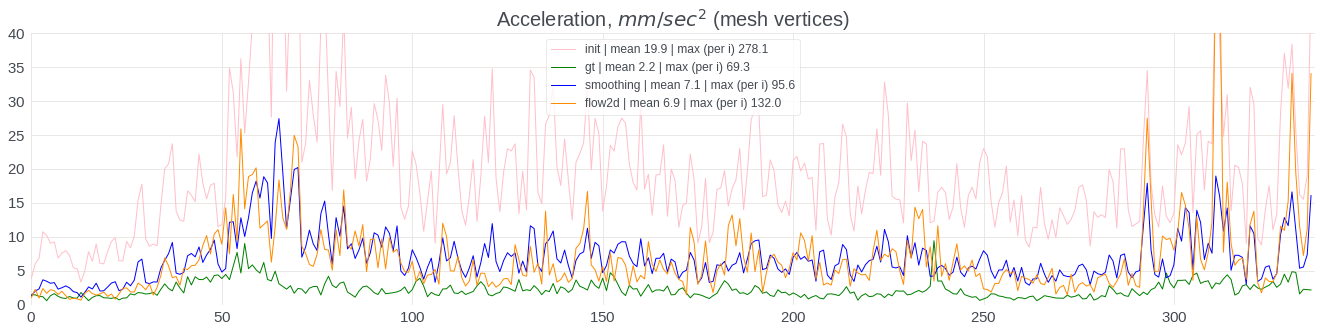

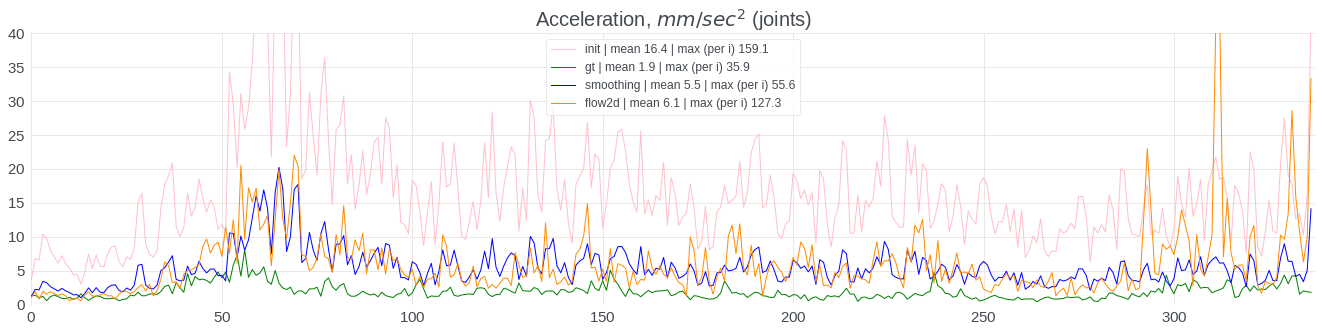

In [351]:
fig_verts, ax_verts = plt.subplots(1, 1, figsize=(23, 5))

for name, accel in d_accel_verts.items():
    accel_normed = norm_accel(accel)
    ax_verts.plot(
        accel_normed.mean(dim=1),
        label=f"{name} | mean {float(accel_normed.mean()):.1f} | max (per i) {float(accel_normed.max()):.1f}",
        c=colors[name],
        linewidth=1,
    )

ax_verts.legend(fontsize=12, loc="upper center")
ax_verts.set_xlim((0, 337))
ax_verts.set_ylim((0, 40))
ax_verts.set_title(r"Acceleration, $mm/sec^2$ (mesh vertices)", fontsize=20)
fig_verts.patch.set_facecolor("white")

fig_joints, ax_joints = plt.subplots(1, 1, figsize=(23, 5))
for name, accel in d_accel_joints.items():
    accel_normed = norm_accel(accel)
    ax_joints.plot(
        accel_normed.mean(dim=1),
        label=f"{name} | mean {float(accel_normed.mean()):.1f} | max (per i) {float(accel_normed.max()):.1f}",
        c=colors[name],
        linewidth=1,
    )

ax_joints.legend(fontsize=12, loc="upper center")
ax_joints.set_xlim((0, 337))
ax_joints.set_ylim((0, 40))
ax_joints.set_title(r"Acceleration, $mm/sec^2$ (joints)", fontsize=20)
fig_joints.patch.set_facecolor("white")

# compute accel errors

In [352]:
d_accel_err_joints = {}
accel_gt = d_accel_joints["gt"]
for name, accel in d_accel_joints.items():
    if name == "gt":
        continue

    d_accel_err_joints[name] = accel_err(accel, accel_gt)

d_accel_err_verts = {}
accel_gt = d_accel_verts["gt"]
for name, accel in d_accel_verts.items():
    if name == "gt":
        continue

    d_accel_err_verts[name] = accel_err(accel, accel_gt)

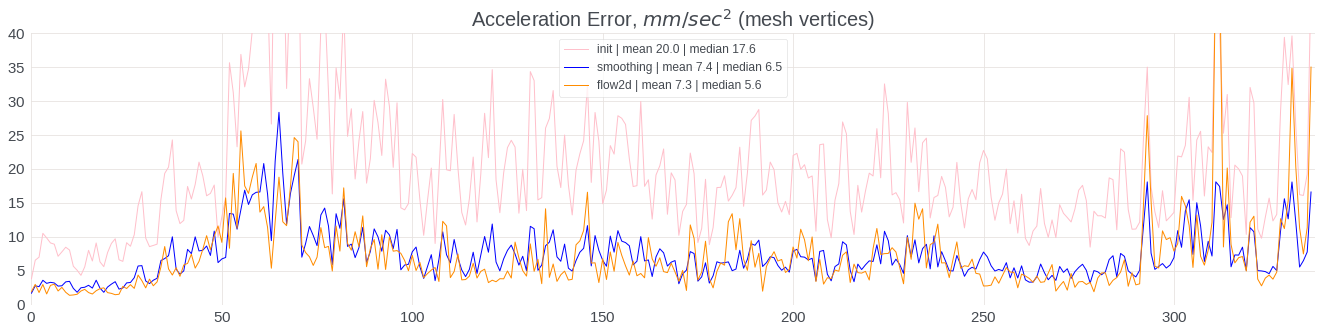

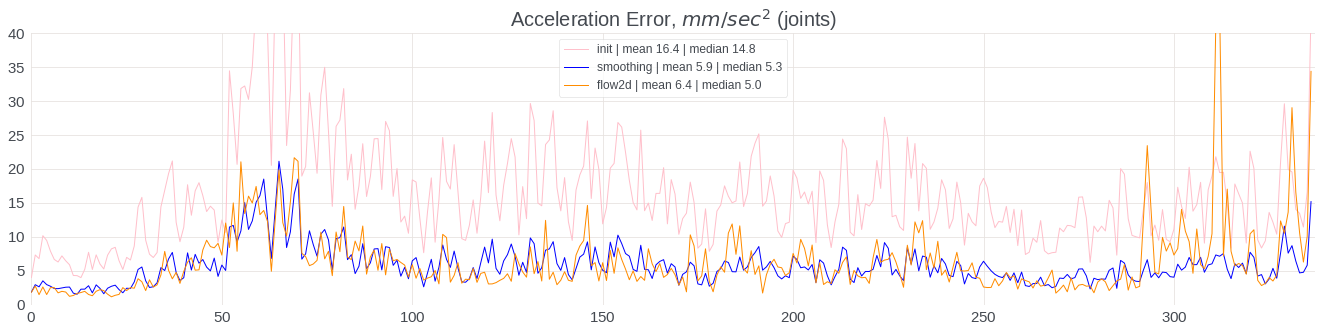

In [353]:
fig_verts, ax_verts = plt.subplots(1, 1, figsize=(23, 5))

for name, accel_err_ in d_accel_err_verts.items():
    ax_verts.plot(
        accel_err_,
        label=f"{name} | mean {float(accel_err_.mean()):.1f} | median {float(accel_err_.median()):.1f}",
        c=colors[name],
        linewidth=1,
    )

ax_verts.legend(fontsize=12, loc="upper center")
ax_verts.set_xlim((0, 337))
ax_verts.set_ylim((0, 40))
ax_verts.set_title(r"Acceleration Error, $mm/sec^2$ (mesh vertices)", fontsize=20)
fig_verts.patch.set_facecolor("white")


fig_joints, ax_joints = plt.subplots(1, 1, figsize=(23, 5))

for name, accel_err_ in d_accel_err_joints.items():
    ax_joints.plot(
        accel_err_,
        label=f"{name} | mean {float(accel_err_.mean()):.1f} | median {float(accel_err_.median()):.1f}",
        c=colors[name],
        linewidth=1,
    )

ax_joints.legend(fontsize=12, loc="upper center")
ax_joints.set_xlim((0, 337))
ax_joints.set_ylim((0, 40))
ax_joints.set_title(r"Acceleration Error, $mm/sec^2$ (joints)", fontsize=20)
fig_joints.patch.set_facecolor("white")

## try to compute difference between normed accelerations

In [355]:
d_accel_err_joints = {}
accel_gt = d_accel_joints["gt"]
for name, accel in d_accel_joints.items():
    if name == "gt":
        continue

    d_accel_err_joints[name] = accel_err_between_normed(accel, accel_gt)

d_accel_err_verts = {}
accel_gt = d_accel_verts["gt"]
for name, accel in d_accel_verts.items():
    if name == "gt":
        continue

    d_accel_err_verts[name] = accel_err_between_normed(accel, accel_gt)

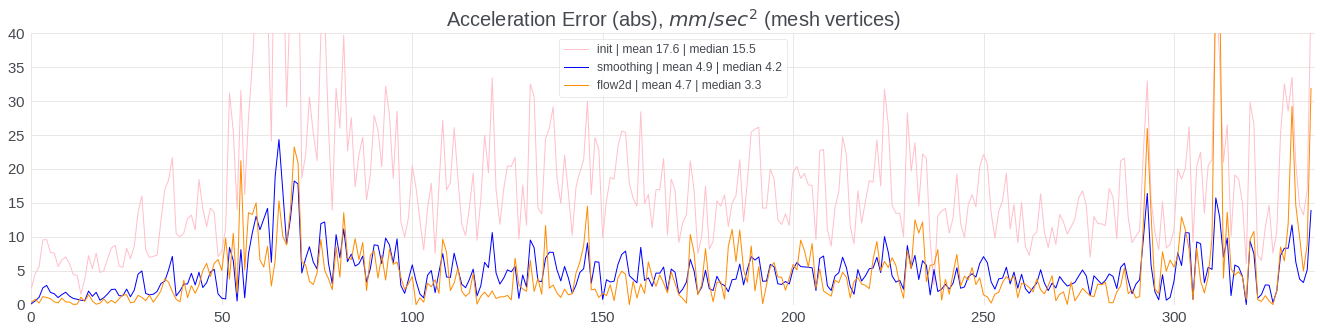

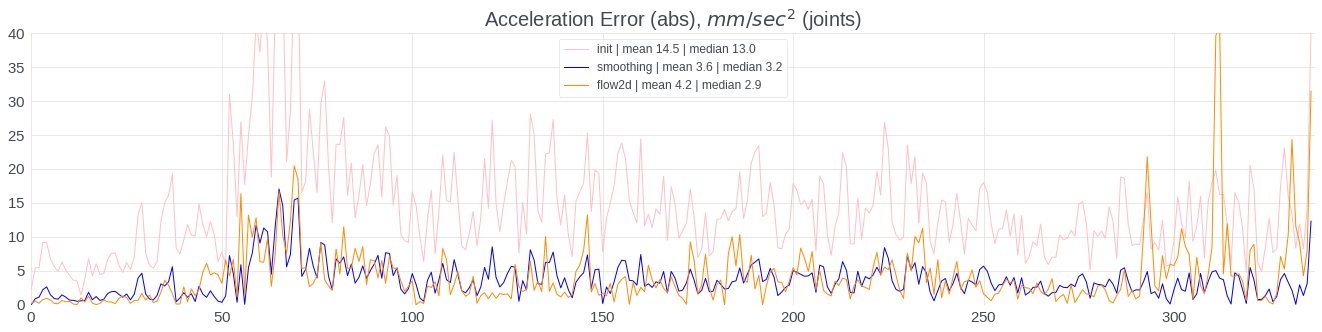

In [356]:
fig_verts, ax_verts = plt.subplots(1, 1, figsize=(23, 5))

for name, accel_err_ in d_accel_err_verts.items():
    ax_verts.plot(
        accel_err_,
        label=f"{name} | mean {float(accel_err_.mean()):.1f} | median {float(accel_err_.median()):.1f}",
        c=colors[name],
        linewidth=1,
    )

ax_verts.legend(fontsize=12, loc="upper center")
ax_verts.set_xlim((0, 337))
ax_verts.set_ylim((0, 40))
ax_verts.set_title(r"Acceleration Error (abs), $mm/sec^2$ (mesh vertices)", fontsize=20)
fig_verts.patch.set_facecolor("white")


fig_joints, ax_joints = plt.subplots(1, 1, figsize=(23, 5))

for name, accel_err_ in d_accel_err_joints.items():
    ax_joints.plot(
        accel_err_,
        label=f"{name} | mean {float(accel_err_.mean()):.1f} | median {float(accel_err_.median()):.1f}",
        c=colors[name],
        linewidth=1,
    )

ax_joints.legend(fontsize=12, loc="upper center")
ax_joints.set_xlim((0, 337))
ax_joints.set_ylim((0, 40))
ax_joints.set_title(r"Acceleration Error (abs), $mm/sec^2$ (joints)", fontsize=20)
fig_joints.patch.set_facecolor("white")

# DEBUG flow2d proc

In [513]:
from src.datasets.datasets_common import UNNORMALIZE
from src.functional import smpl
from src.functional.renderer import get_default_cameras
from src.models.seq_optim import SeqModel
from src.utils.optical_flow_vis_utils import flow_to_image

In [514]:
device = "cpu"
params = {
    "seq_path": "manifold://xr_body/tree/personal/andreydavydov/3dpw_seq_for_tests/sample_3dpw_test_seq_downtown_runForBus_01_0__hmr_coco_all.pth",
    "seq_num_frames": 339,
    "optical_flow_presaved": "manifold://xr_body/tree/personal/andreydavydov/3dpw_seq_for_tests/optical_flow_presaved/optical_flows_for_seq.pth",
}
seqOpt = SeqModel(**params)

opt_flow_forward = seqOpt.optical_flow["forward_time"].to(device)
opt_flow_backward = seqOpt.optical_flow["backward_time"].to(device)

img = UNNORMALIZE(seqOpt.orig_seq["img"]).to(device)
img_size = img.size(-1)

start_idx, end_idx = 100, 101
opt_flow_forward = opt_flow_forward[start_idx:end_idx]
opt_flow_backward = opt_flow_backward[start_idx:end_idx]
img = img[start_idx : end_idx + 1]
seqOpt.shape.data = seqOpt.shape.data[start_idx : end_idx + 1]
seqOpt.pose.data = seqOpt.pose.data[start_idx : end_idx + 1]
seqOpt.camera.data = seqOpt.camera.data[start_idx : end_idx + 1]

batch_size = img.size(0)

smpl_model_49 = smpl.get_smpl_model("extra", device=device)
smpl_model_faces = smpl_model_49.faces.astype(int)

cameras = get_default_cameras(device, mode="orthographic")

_, _, verts3d = seqOpt(smpl_model_49)
batch_size = verts3d.size(0)

### set faces for renderer
faces = torch.tensor(smpl_model_faces.copy()).unsqueeze(0)

### align vertices with pixels
camera = seqOpt.camera
scale, trans = camera[:, 0].to(device), camera[:, 1:].to(device)
verts3d = verts3d * scale.view(batch_size, 1, 1)
verts3d[:, :, 0:2] = verts3d[:, :, 0:2] + trans.view(batch_size, 1, 2)
verts3d = (verts3d + 1) / 2 * img_size

I0921 084909.904 manifold.py:1435] URL manifold://xr_body/tree/personal/andreydavydov/3dpw_seq_for_tests/sample_3dpw_test_seq_downtown_runForBus_01_0__hmr_coco_all.pth was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/3dpw_seq_for_tests/sample_3dpw_test_seq_downtown_runForBus_01_0__hmr_coco_all.pth


I0921 084910.262 manifold.py:1435] URL manifold://xr_body/tree/personal/andreydavydov/3dpw_seq_for_tests/optical_flow_presaved/optical_flows_for_seq.pth was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/3dpw_seq_for_tests/optical_flow_presaved/optical_flows_for_seq.pth


I0921 084910.647 manifold.py:1435] URL manifold://xr_body/tree/personal/andreydavydov/eft/extradata/smpl/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/eft/extradata/smpl/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl


I0921 084910.751 manifold.py:1435] URL manifold://xr_body/tree/personal/andreydavydov/eft/extradata/data_from_spin/J_regressor_extra.npy was already cached in /var/svcscm/.torch/iopath_cache/manifold_cache/tree/personal/andreydavydov/eft/extradata/data_from_spin/J_regressor_extra.npy


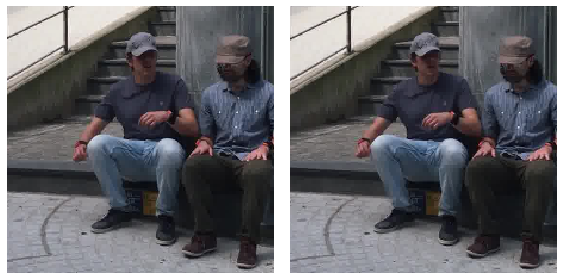

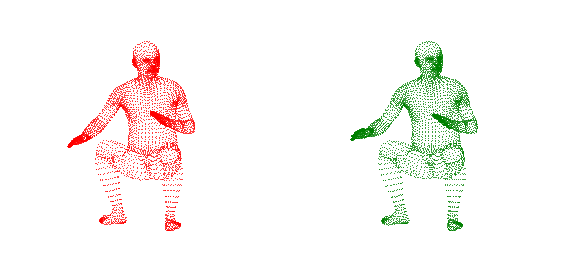

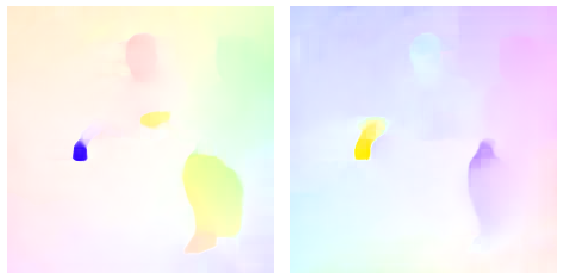

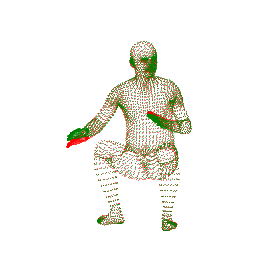

In [515]:
### plot pair and flow and with predicted vertices from HMR
figsize = (8,4)
fig, ax = plt.subplots(1, 2, figsize=figsize)
ax[0].imshow(img[0].permute(1, 2, 0))
ax[1].imshow(img[1].permute(1, 2, 0))

for axis in ax.flatten():
    axis.set_axis_off()
fig.patch.set_facecolor("white")
fig.tight_layout()

fig, ax = plt.subplots(1, 2, figsize=figsize)
# ax[0].imshow(img[0].permute(1, 2, 0))
ax[0].scatter(verts3d.detach()[0][:, 0], verts3d.detach()[0][:, 1], c="red", s=0.2)
# ax[1].imshow(img[1].permute(1, 2, 0))
ax[1].scatter(verts3d.detach()[1][:, 0], verts3d.detach()[1][:, 1], c="green", s=0.2)
for axis in ax:
    axis.set_xlim(0, 224)
    axis.set_ylim(224, 0)

for axis in ax.flatten():
    axis.set_axis_off()
fig.tight_layout()

fig, ax = plt.subplots(1, 2, figsize=figsize)
ax[0].imshow(flow_to_image(opt_flow_forward[0].permute(1, 2, 0).cpu().numpy()))
ax[1].imshow(flow_to_image(opt_flow_backward[0].permute(1, 2, 0).cpu().numpy()))
for axis in ax.flatten():
    axis.set_axis_off()
fig.patch.set_facecolor("white")
fig.tight_layout()

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(verts3d.detach()[0][:, 0], verts3d.detach()[0][:, 1], c="red", s=0.1)
ax.scatter(verts3d.detach()[1][:, 0], verts3d.detach()[1][:, 1], c="green", s=0.1)
ax.set_axis_off()
ax.set_xlim(0, 224)
ax.set_ylim(224, 0)
ax.set_aspect("equal")
# fig.patch.set_facecolor("white")
fig.tight_layout()

# ax[4].set_aspect("equal")
# ax[4].set_xlim(0, 224)
# ax[4].set_ylim(224, 0)
# for axis in ax.flatten():
#     axis.set_axis_off()
# fig.patch.set_facecolor("white")
# fig.tight_layout()